In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
#Importing scikit-learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv("/content/Heart_Disease.csv")

In [35]:
data.rename(columns={'Heart Disease':'HeartOut'}, inplace=True)


In [90]:
data.head(15)

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,3,1
1,67,0,3,115,279,0,2,160,0,1.6,2,0,7,2,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,3,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,3,2
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,2,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,3,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,3,0
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,3,0
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,3,0
9,63,0,4,150,279,0,2,154,0,4.0,2,3,7,3,0


In [71]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Gender                   270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
data.describe(include = 'all')

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,261,264,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,never smoked,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,96,150
mean,135.500000,54.414815,0.685185,3.322222,129.737037,246.711111,0.148148,1.022222,149.907407,0.329630,0.998889,1.585185,0.529630,4.696296,NaN,NaN,NaN
std,78.086491,9.080708,0.465305,0.729023,14.889722,44.084638,0.355906,0.997891,22.685230,0.470952,1.031528,0.614390,0.703848,1.940659,NaN,NaN,NaN
min,1.000000,29.000000,0.000000,2.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,NaN,NaN
25%,68.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,NaN,NaN
50%,135.500000,54.500000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,NaN,NaN,NaN
75%,202.750000,61.000000,1.000000,4.000000,140.000000,278.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,NaN,NaN,NaN


In [55]:
#no of null values in each column
data.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
HeartOut                   0
dtype: int64

In [73]:
data.nunique()

id                         270
Age                         41
Gender                       2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
work_type                    5
smoking_status               3
HeartOut                     2
dtype: int64

In [50]:
# determin categorical from numerical data
for column in data.columns:
    unique_values = len(data[column].unique())
    if unique_values < 5:  
        print(f"{column}: Categorical")
    else:
        print(f"{column}: Numerical")

id: Numerical
Age: Numerical
Gender: Categorical
Chest pain type: Categorical
BP: Numerical
Cholesterol: Numerical
FBS over 120: Categorical
EKG results: Categorical
Max HR: Numerical
Exercise angina: Categorical
ST depression: Numerical
Slope of ST: Categorical
Number of vessels fluro: Categorical
Thallium: Categorical
work_type: Numerical
smoking_status: Numerical
HeartOut: Categorical


In [62]:
data['Gender'] = data['Gender'].replace("Female",1)
data['Gender'] = data['Gender'].replace("Male",0)

In [65]:
#change smoking_status
data['smoking_status'] = data['smoking_status'].replace("Unknown",0)
data['smoking_status'] = data['smoking_status'].replace("never smoked",0)
data['smoking_status'] = data['smoking_status'].replace("formerly smoked",1)
data['smoking_status'] = data['smoking_status'].replace("smokes",2)

In [70]:
#change work_type
data['work_type'] = data['work_type'].replace("Never_worked",0)
data['work_type'] = data['work_type'].replace("children",1)
data['work_type'] = data['work_type'].replace("Self-employed",2)
data['work_type'] = data['work_type'].replace("Private",3)
data['work_type'] = data['work_type'].replace("Govt_job",4)

In [ ]:
#check for duplicated rows
sum(data.duplicated('id')) 

0

In [ ]:
#data = data.drop(['work_type'], axis = 1)

In [ ]:
#data = data.drop(['smoking_status'], axis = 1)

In [74]:
data.dtypes

id                           int64
Age                          int64
Gender                       int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                    int64
smoking_status               int64
HeartOut                    object
dtype: object

In [43]:
#replace null values in age with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'] = data['Age'].astype('int64')

In [54]:
#replace null values in work/smoking
data['work_type'] = data['work_type'].fillna("Private")
data['smoking_status'] = data['smoking_status'].fillna("never smoked")

In [44]:
#replace null values in Gender with Female as it is the top value
data['Gender'] = data['Gender'].fillna(1)
data['Gender'] = data['Gender'].astype('int64')

<Axes: >

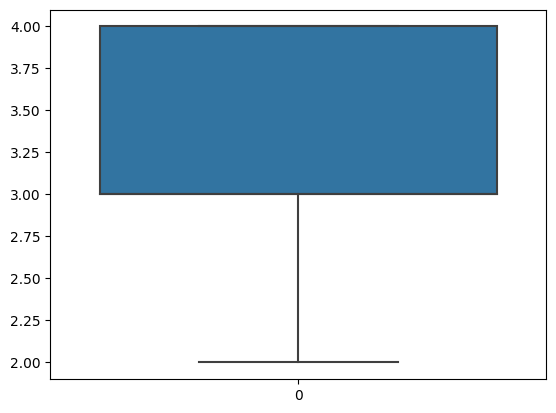

In [ ]:
#detecting the outliers
sns.boxplot(data['Chest pain type'])
#replace values with min

<Axes: >

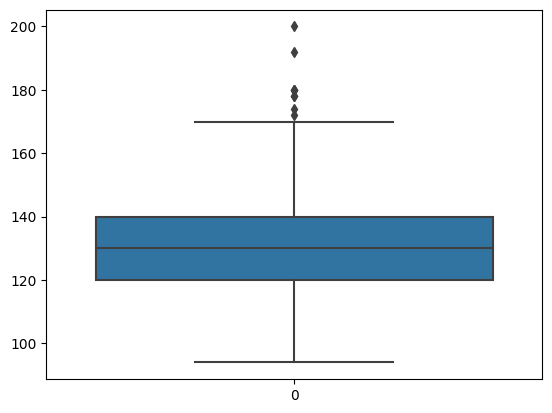

In [ ]:
sns.boxplot(data['BP'])
#replace values with max

<Axes: >

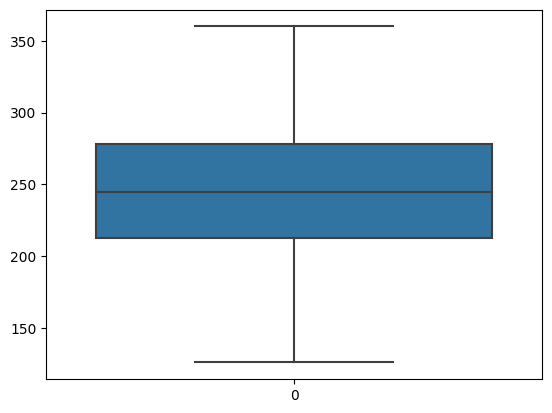

In [98]:
sns.boxplot(data['Cholesterol'])
#replace values with max

<Axes: >

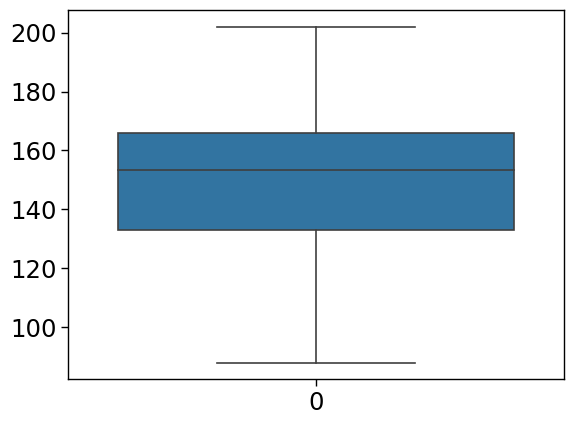

In [ ]:
sns.boxplot(data['Max HR'])
#replace values with min

<Axes: >

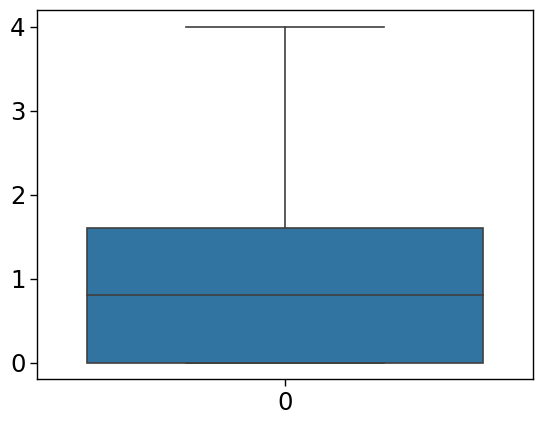

In [ ]:
sns.boxplot(data['ST depression'])
#replace values with max

<Axes: >

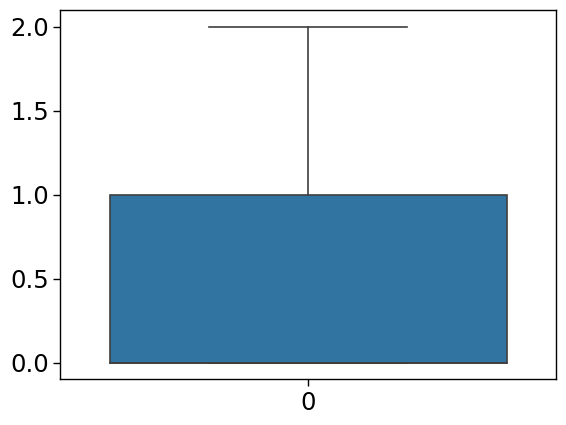

In [ ]:
sns.boxplot(data['Number of vessels fluro'])

<Axes: >

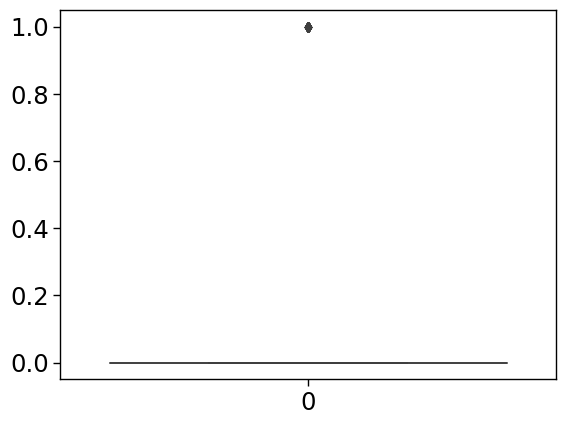

In [ ]:
sns.boxplot(data['FBS over 120'])

In [75]:
#getting outliers with the iqr method of the BP
Q1 = np.percentile(data['BP'], 25, method = 'midpoint')
Q3 = np.percentile(data['BP'], 75, method = 'midpoint')
IQR = Q3 - Q1
upper_boundBP = data['BP'] >= (Q3+1.5*IQR)
lower_boundBP = data['BP'] <= (Q1-1.5*IQR)
BP_out = np.where(upper_boundBP)[0]
data.loc[BP_out, 'BP'] = Q3


In [76]:
#outliers of the Cholestrol
Q1c = np.percentile(data['Cholesterol'], 25, method = 'midpoint')
Q3c = np.percentile(data['Cholesterol'], 75, method = 'midpoint')
IQRc = Q3c - Q1c
upper_boundc = data['Cholesterol'] >= (Q3c+1.5*IQRc)
lower_boundc = data['Cholesterol'] <= (Q1c-1.5*IQRc)
Ch_out = np.where(upper_boundc)[0]
data.loc[Ch_out, 'Cholesterol'] = Q3c

In [77]:
#outliers of the Max HR
Max = data['Max HR']
M_out = np.where(Max < 75)[0]
q1m = Max.quantile(0.25)
data.loc[M_out, 'Max HR'] = q1m

In [78]:
#outliers of the ST depression
ST = data['ST depression']
ST_out = np.where(ST > 4)[0]
q3s = ST.quantile(0.75)
data.loc[ST_out, 'ST depression'] = q3s

<Axes: xlabel='Gender', ylabel='Age'>

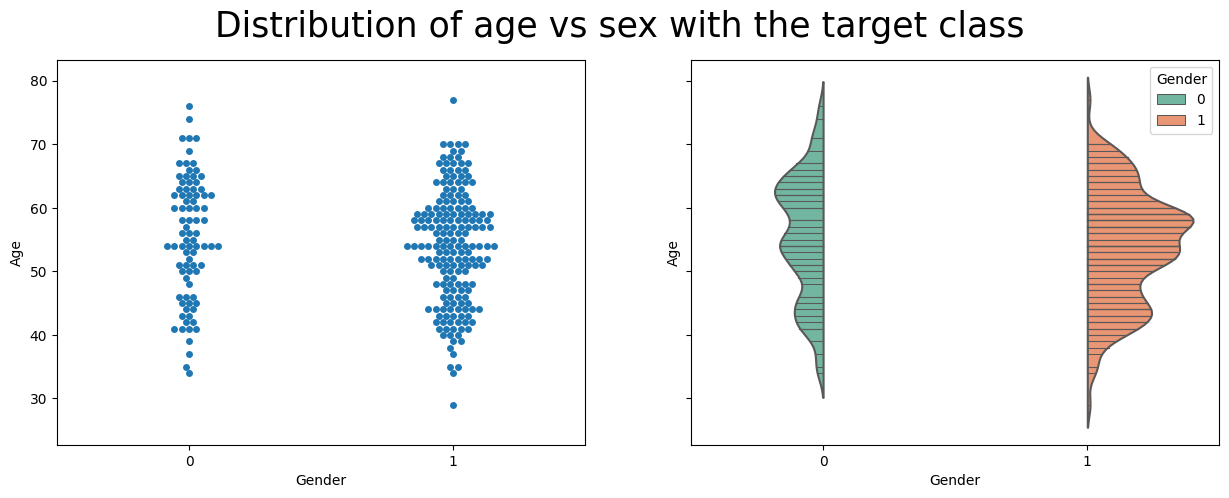

In [ ]:
# distribution of sex vs age  with target
import seaborn as sb
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of age vs sex with the target class',fontsize=25)

sb.swarmplot(ax=axes[0],y = data['Age'], x = data['Gender'])

sb.violinplot(ax=axes[1],x="Gender", y= data['Age'], hue="Gender",
                    data=data, palette="Set2", split=True,
                    scale="count", inner="stick",
                    scale_hue=False, bw=.2)

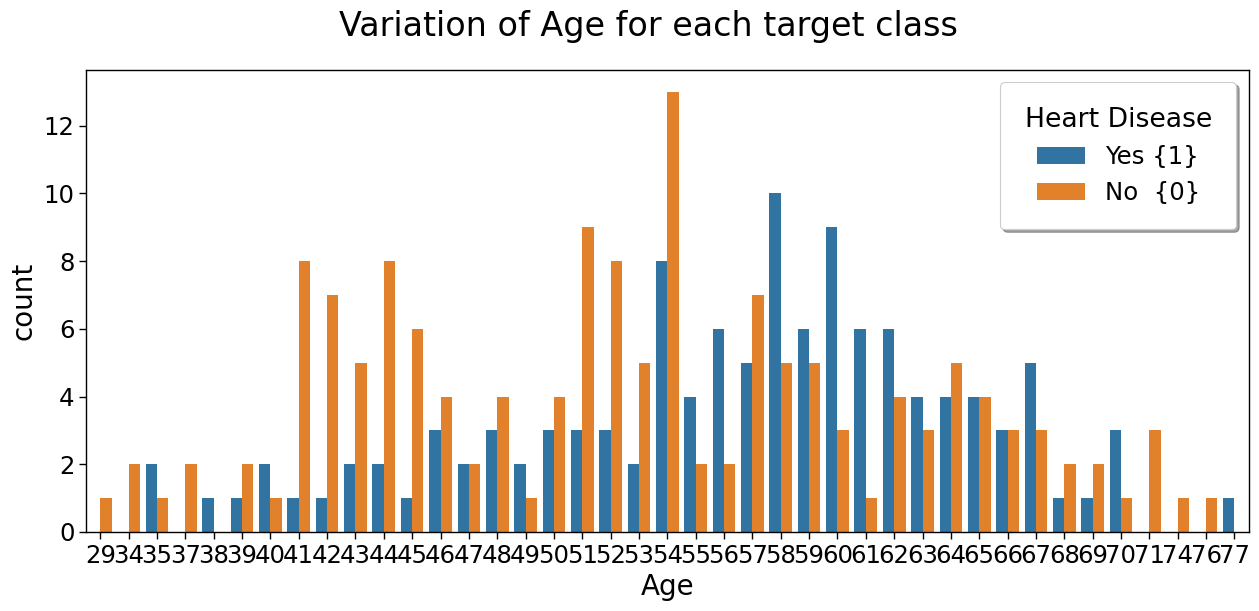

In [ ]:
# distribution of age  with the disease
sb.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
fig, ax = plt.subplots(figsize=(15, 6))
a = sb.countplot(ax = ax, data = data, x = 'Age', hue = 'HeartOut', order = data['Age'].sort_values().unique())
legend_labels, _= a.get_legend_handles_labels()
ax.legend(legend_labels, ['Yes {1}','No  {0}'], bbox_to_anchor=(1,1),title="Heart Disease",fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.suptitle('Variation of Age for each target class')
plt.show()

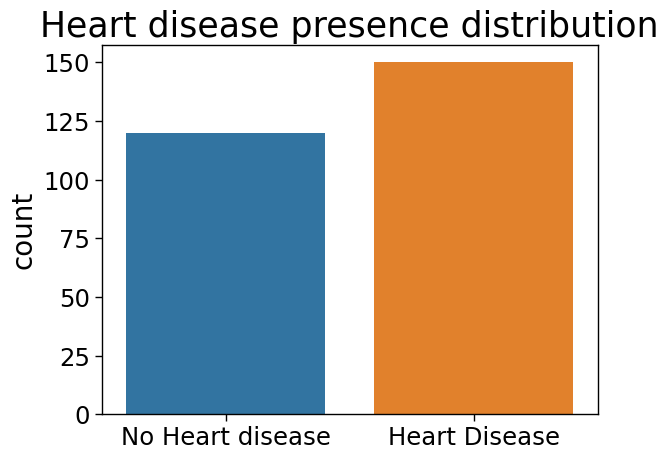

In [ ]:
#ppl with heart disease vs with no heart disease
f = sns.countplot(x='HeartOut', data=data)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

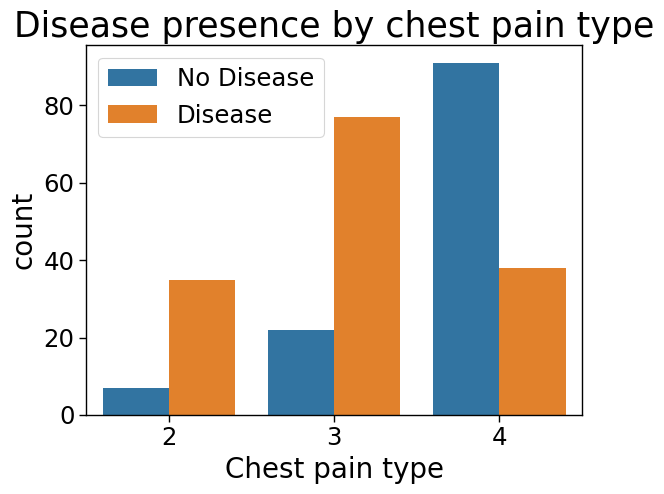

In [ ]:
#relation between chest pain type and heart disease
f = sns.countplot(x='Chest pain type', data=data, hue='HeartOut')

f.set_title('Disease presence by chest pain type')
plt.ylabel('count')
plt.xlabel('Chest pain type')
plt.legend(['No Disease', 'Disease']);

In [79]:
#only run to download modified data
from google.colab import files
data.to_csv("Modified_Data.csv", index=False)
files.download("Modified_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#correlation matrix for feature selection
matrix = data.corr().round(2)
print(matrix)

                           id   Age  Gender  Chest pain type    BP  \
id                       1.00 -0.04    0.03            -0.04  0.04   
Age                     -0.04  1.00   -0.08             0.16  0.27   
Gender                   0.03 -0.08    1.00             0.10 -0.04   
Chest pain type         -0.04  0.16    0.10             1.00  0.05   
BP                       0.04  0.27   -0.04             0.05  1.00   
Cholesterol              0.11  0.19   -0.14             0.07  0.16   
FBS over 120            -0.01  0.12    0.04            -0.07  0.11   
EKG results             -0.04  0.13    0.06             0.15  0.12   
Max HR                   0.10 -0.39   -0.08            -0.35 -0.06   
Exercise angina         -0.06  0.10    0.17             0.40  0.03   
ST depression            0.07  0.20    0.11             0.29  0.17   
Slope of ST              0.02  0.15    0.05             0.23  0.10   
Number of vessels fluro -0.03  0.35    0.07             0.25  0.04   
Thallium            

<ipython-input-212-44ac15cdfbe5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr().round(2)


In [139]:
#feature scaling
columns_to_scale = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
#columns to be excluded from scaling
columns_to_exclude = ['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
scaled_data = data.copy()

# Using MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the selected columns
scaled_data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Combine the scaled columns with the excluded columns
scaled_data = pd.concat([scaled_data[columns_to_exclude], scaled_data[columns_to_scale]], axis=1)

In [ ]:
#splitting the data
y = data.HeartOut
data.drop(['HeartOut'], axis=1, inplace=True)

In [140]:
X = scaled_data

In [ ]:
#drop id as it wont affect our prediction 
data.drop(['id'], axis=1, inplace=True)

In [81]:
#change categorical values
y= y.map({'Yes':1,'No':0})

In [142]:
# Now we split the dataset in train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [143]:
print(y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: HeartOut, Length: 270, dtype: int64


In [144]:
#trainning the model
model  = LogisticRegression()

In [145]:
#building the feature selection method (bonus)
rfe = RFE(estimator=model, n_features_to_select=11)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [146]:
#train the model
model.fit(X_train_rfe, y_train)

LogisticRegression()

In [147]:
#predict the output
y_pred = model.predict(X_test_rfe)


In [148]:
#get accuracy
accuracy = model.score(X_test_rfe, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8111111111111111


In [149]:
#get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[43 10]
 [ 7 30]]


In [150]:
#get classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.75      0.81      0.78        37

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [151]:
#get the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.18888888888888888
